In [5]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# For reading stock data from yahoo
from pandas_datareader import DataReader, wb

In [6]:
#for time stamps
from datetime import datetime

In [7]:
#for division
from __future__ import division

In [8]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

In [9]:
#For loop for grabing yahoo finance data and setting as a dataframe

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [10]:
# Summary Stats
AAPL.describe()

High         Low        Open       Close        Volume  \
count  254.000000  254.000000  254.000000  254.000000  2.540000e+02   
mean   233.335669  229.166772  231.019133  231.444276  2.857213e+07   
std     45.240826   44.385567   44.735807   44.946904  1.071934e+07   
min    173.070007  169.500000  170.320007  172.500000  1.136200e+07   
25%    200.244995  197.320000  198.679993  198.972496  2.112900e+07   
50%    213.500000  210.129997  210.885002  210.440002  2.626140e+07   
75%    266.349998  262.514992  263.780006  265.302490  3.277622e+07   
max    327.850006  323.350006  324.739990  327.200012  7.983450e+07   

        Adj Close  
count  254.000000  
mean   230.036280  
std     45.542701  
min    170.271317  
25%    196.699081  
50%    209.119019  
75%    264.674332  
max    327.200012

In [25]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-02-27 to 2020-02-27
Data columns (total 6 columns):
High         253 non-null float64
Low          253 non-null float64
Open         253 non-null float64
Close        253 non-null float64
Volume       253 non-null float64
Adj Close    253 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


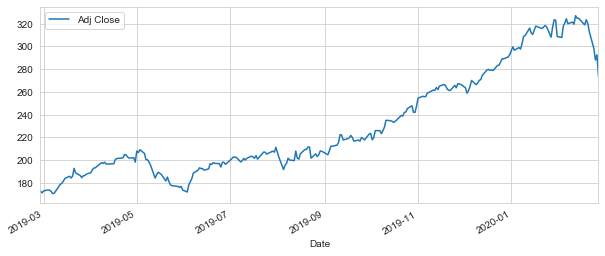

In [26]:
# Let's see a historical view of the closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

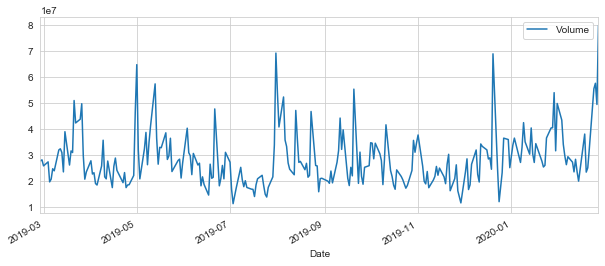

In [27]:
# Now let's plot the total volume of stock being traded each day over the past 5 years
AAPL['Volume'].plot(legend=True,figsize=(10,4))

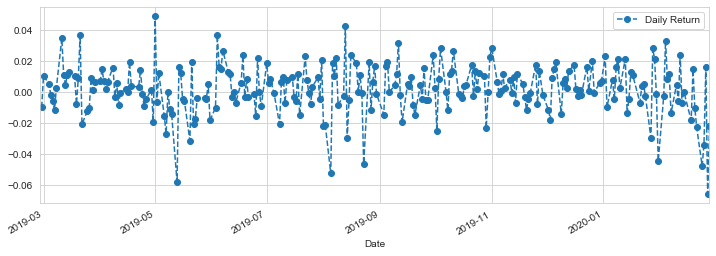

In [17]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

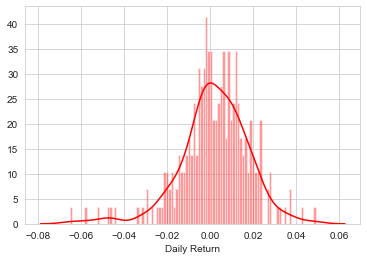

In [18]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

# Could have also done:
#AAPL['Daily Return'].hist()

In [11]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [12]:
closing_df.head()

Symbols           AAPL         GOOG        MSFT         AMZN
Date                                                        
2019-02-27  172.610687  1116.050049  110.705299  1641.089966
2019-02-28  170.912918  1119.920044  110.567131  1639.829956
2019-03-01  172.709381  1140.989990  111.060608  1671.729980
2019-03-04  173.578033  1147.800049  110.794128  1696.170044
2019-03-05  173.262161  1162.030029  110.241432  1692.430054

In [13]:
# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()

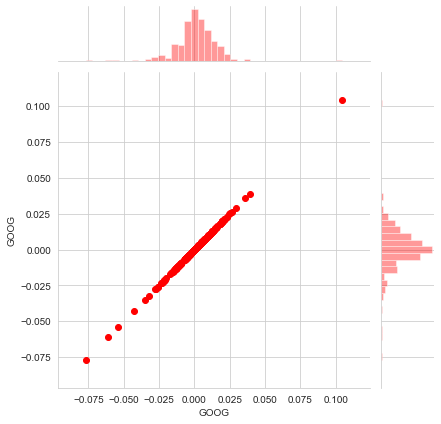

In [14]:

# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color="red")

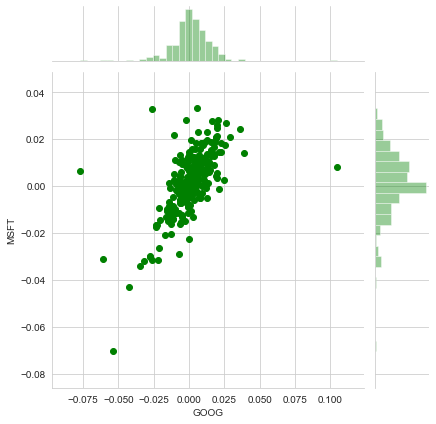

In [50]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter',color="green")

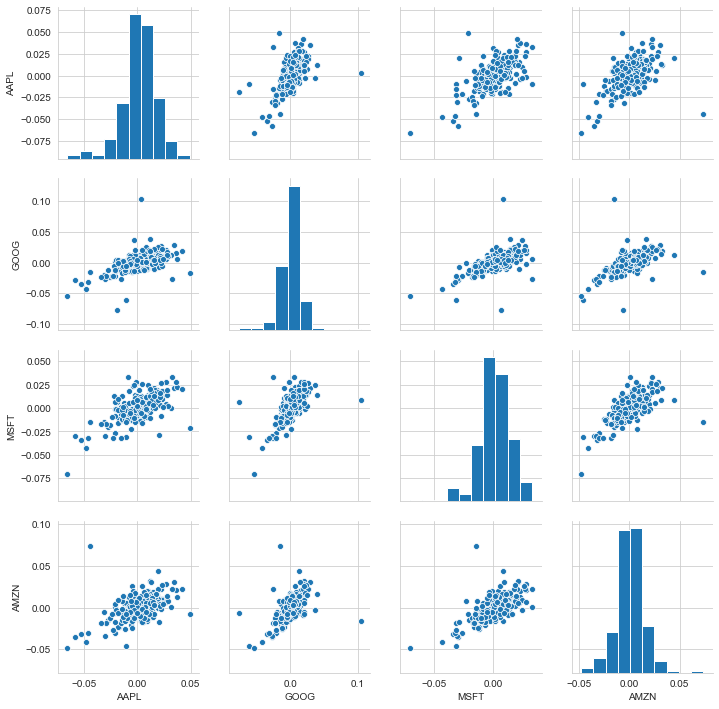

In [51]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(tech_rets.dropna())

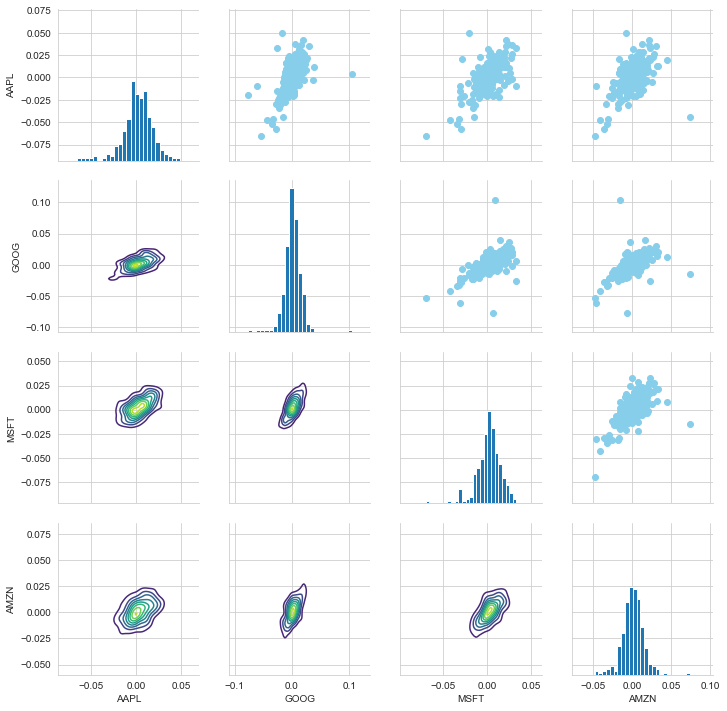

In [65]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='skyblue')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='viridis')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=25)

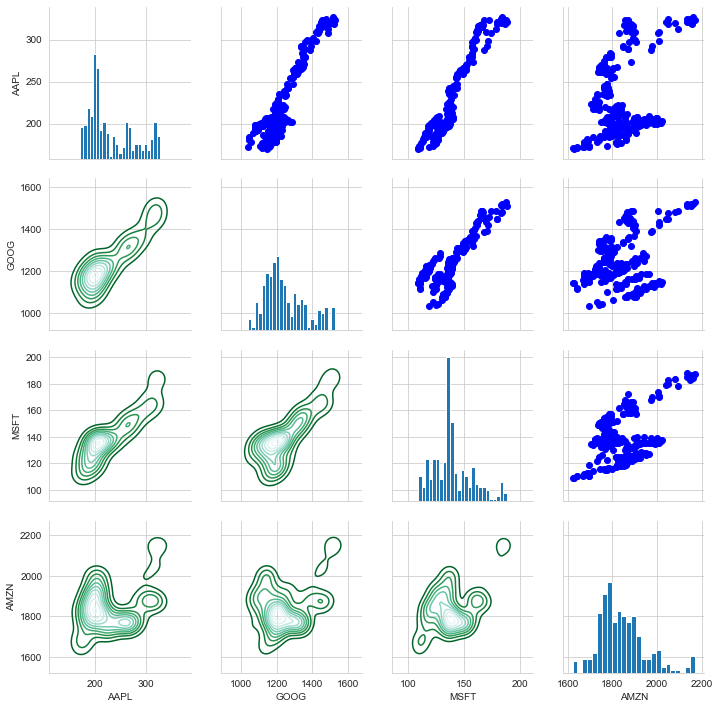

In [69]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='blue')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='BuGn_r')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(plt.hist,bins=25)

In [28]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate("",
            xy=(0.2, 0.2), xycoords='data',
            xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.5"),
            )


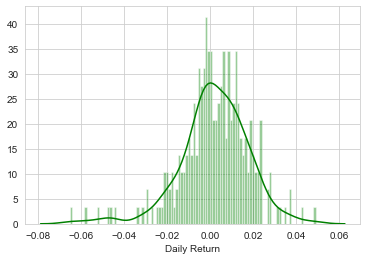

In [22]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='green')

In [29]:
# The 0.05 empirical quantile of daily returns
rets['AAPL'].quantile(0.05)

-0.02283218910207163

In [30]:

# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

# Now let's grab our mu (drift) from the expected return data we got for AAPL
mu = rets.mean()['GOOG']

# Now let's grab the volatility of the stock from the std() of the average return
sigma = rets.std()['GOOG']

In [42]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in xrange(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price    
        

In [43]:
GOOG.head()

High          Low         Open        Close   Volume  \
Date                                                                      
2019-02-27  1117.979980  1101.000000  1106.949951  1116.050049   968400   
2019-02-28  1127.650024  1111.010010  1111.300049  1119.920044  1542500   
2019-03-01  1142.969971  1124.750000  1124.900024  1140.989990  1450300   
2019-03-04  1158.280029  1130.689941  1146.989990  1147.800049  1446000   
2019-03-05  1169.609985  1146.194946  1150.060059  1162.030029  1443200   

              Adj Close  
Date                     
2019-02-27  1116.050049  
2019-02-28  1119.920044  
2019-03-01  1140.989990  
2019-03-04  1147.800049  
2019-03-05  1162.030029

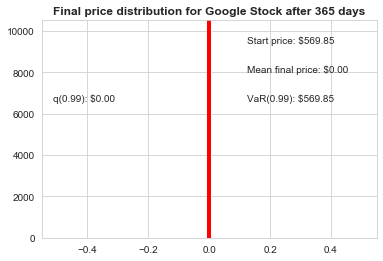

In [40]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');